In [1]:
import pandas as pd
import glob
import pickle

# Define the path where your CSV files are stored
path = 'CSVFile'

# Use the glob module to get all the CSV files in the specified path
all_files = glob.glob(path + "/*.csv")

# Create an empty list to store the dataframes from each CSV file
dfs = []

# Loop through each CSV file and read it into a dataframe using pandas.read_csv()
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)

combined_df = pd.concat(dfs, axis=0, ignore_index=True)
combined_df.head()

,Unnamed: 0,eth_dst,eth_src,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,...,tcp_dataofs,tcp_reserved,tcp_flags,tcp_window,tcp_chksum,tcp_urgptr,framenumber,arp,tcp_flag_reset,target
0,0,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4146,DF,...,8,0,A,1869,50618,0,-1,-1,-1,BENIGN
1,1,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,82,4147,DF,...,8,0,PA,1869,50854,0,-1,-1,-1,BENIGN
2,2,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4148,DF,...,8,0,A,1869,31989,0,-1,-1,-1,BENIGN
3,3,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4149,DF,...,8,0,A,1869,18244,0,-1,-1,-1,BENIGN
4,4,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4150,DF,...,8,0,A,1869,7071,0,-1,-1,-1,BENIGN


In [2]:
combined_df=combined_df.drop(['Unnamed: 0'], axis=1)

combined_df = combined_df.fillna(-1)
combined_df.head()

,eth_dst,eth_src,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_flags,arp_src_ipv4,...,tcp_dataofs,tcp_reserved,tcp_flags,tcp_window,tcp_chksum,tcp_urgptr,framenumber,arp,tcp_flag_reset,target
0,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4146,DF,-1,...,8,0,A,1869,50618,0,-1,-1,-1,BENIGN
1,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,82,4147,DF,-1,...,8,0,PA,1869,50854,0,-1,-1,-1,BENIGN
2,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4148,DF,-1,...,8,0,A,1869,31989,0,-1,-1,-1,BENIGN
3,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4149,DF,-1,...,8,0,A,1869,18244,0,-1,-1,-1,BENIGN
4,48:4b:aa:2c:d8:f9,bc:1c:81:4b:ae:ba,2048,4,5,2,1440,4150,DF,-1,...,8,0,A,1869,7071,0,-1,-1,-1,BENIGN


In [3]:
combined_df.isnull().sum()

eth_dst           0
eth_src           0
eth_type          0
ip_version        0
ip_ihl            0
ip_tos            0
ip_len            0
ip_id             0
ip_flags          0
arp_src_ipv4      0
arp_dst_ipv4      0
arp_src_mac       0
arp_dst_mac       0
ip_frag           0
ip_ttl            0
ip_proto          0
ip_chksum         0
ip_src            0
ip_dst            0
udp_sport         0
udp_dport         0
udp_len           0
udp_chksum        0
icmp              0
tcp               0
tcp_sport         0
tcp_flags_syn     0
tcp_dport         0
tcp_seq           0
tcp_ack           0
tcp_dataofs       0
tcp_reserved      0
tcp_flags         0
tcp_window        0
tcp_chksum        0
tcp_urgptr        0
framenumber       0
arp               0
tcp_flag_reset    0
target            0
dtype: int64

In [4]:
result = combined_df.dtypes
result

eth_dst           object
eth_src           object
eth_type           int64
ip_version         int64
ip_ihl             int64
ip_tos             int64
ip_len             int64
ip_id              int64
ip_flags          object
arp_src_ipv4      object
arp_dst_ipv4      object
arp_src_mac       object
arp_dst_mac       object
ip_frag            int64
ip_ttl             int64
ip_proto           int64
ip_chksum          int64
ip_src            object
ip_dst            object
udp_sport          int64
udp_dport          int64
udp_len            int64
udp_chksum         int64
icmp               int64
tcp                int64
tcp_sport          int64
tcp_flags_syn      int64
tcp_dport          int64
tcp_seq            int64
tcp_ack            int64
tcp_dataofs        int64
tcp_reserved       int64
tcp_flags         object
tcp_window         int64
tcp_chksum         int64
tcp_urgptr         int64
framenumber        int64
arp                int64
tcp_flag_reset     int64
target            object


In [5]:
col_list = combined_df.select_dtypes(include=['object']).columns.to_list()
combined_df=combined_df.drop(col_list[0:-1], axis=1)
with open('keysInformation.pkl', 'wb') as f:
    pickle.dump(col_list[0:-1], f)
col_list = combined_df.select_dtypes(include=['object']).columns.to_list()


In [6]:
combined_df[col_list] = combined_df[col_list].apply(lambda x: x.astype('category').cat.codes)
combined_df.head()



,eth_type,ip_version,ip_ihl,ip_tos,ip_len,ip_id,ip_frag,ip_ttl,ip_proto,ip_chksum,...,tcp_ack,tcp_dataofs,tcp_reserved,tcp_window,tcp_chksum,tcp_urgptr,framenumber,arp,tcp_flag_reset,target
0,2048,4,5,2,1440,4146,0,64,6,41910,...,4049664687,8,0,1869,50618,0,-1,-1,-1,0
1,2048,4,5,2,82,4147,0,64,6,43267,...,4049664687,8,0,1869,50854,0,-1,-1,-1,0
2,2048,4,5,2,1440,4148,0,64,6,41908,...,4049664687,8,0,1869,31989,0,-1,-1,-1,0
3,2048,4,5,2,1440,4149,0,64,6,41907,...,4049664687,8,0,1869,18244,0,-1,-1,-1,0
4,2048,4,5,2,1440,4150,0,64,6,41906,...,4049664687,8,0,1869,7071,0,-1,-1,-1,0


In [7]:
combined_df.to_csv("finaldatset.csv")


In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Split data into features and target
X = combined_df.drop('target', axis=1)
y = combined_df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create logistic regression model and fit to training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
# Store the model and evaluation metrics in a pickle file
with open('logistic.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 0.8368958406679072
Precision: 0.7008304661831212
Recall: 0.8368958406679072
F1 score: 0.7627469751529427


In [10]:
# Create decision tree model and fit to training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Store the model and evaluation metrics in a pickle file

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('decisiontree.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 0.999949705778806
Precision: 0.9999497104871211
Recall: 0.999949705778806
F1 score: 0.99994970484646


In [11]:
# Create random forest model and fit to training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('randomforest.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [12]:

# Create logistic regression and decision tree models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()

# Create ensemble model with logistic regression and decision tree classifiers
model = VotingClassifier(estimators=[('lr', logreg), ('dt', dt)])

# Fit the ensemble model to the training data
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('decisiontreewithlogit.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 0.9854649700749384
Precision: 0.9714134477944838
Recall: 0.9854649700749384
F1 score: 0.9783447485077479


In [13]:
# Create decision tree and random forest models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Create ensemble model with decision tree and random forest classifiers
model = VotingClassifier(estimators=[('dt', dt), ('rf', rf)])

# Fit the ensemble model to the training data
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('decisiontreewithrandom.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [14]:
# Create logistic regression and random forest models
lr = LogisticRegression()
rf = RandomForestClassifier()

# Create ensemble model with logistic regression and random forest classifiers
model = VotingClassifier(estimators=[('lr', lr), ('rf', rf)])

# Fit the ensemble model to the training data
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('logitwithrandomforest.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 0.9855655585173264
Precision: 0.9715088235176511
Recall: 0.9855655585173264
F1 score: 0.9784440162069915


In [15]:
# Create logistic regression and random forest models and decicion tree
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Create ensemble model with logistic regression, random forest and decicion tree classifiers
model = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('dt', dt)])

# Fit the ensemble model to the training data
model.fit(X_train, y_train)

# Predict on test data and calculate evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
with open('logitrandomforestdecicion.pkl', 'wb') as f:
    pickle.dump((model, accuracy, precision, recall, f1), f)

Accuracy: 0.9998994115576121
Precision: 0.9998994303891092
Recall: 0.9998994115576121
F1 score: 0.9998994078272994


In [16]:
pklFiles = ['logistic.pkl','decisiontree.pkl','randomforest.pkl','decisiontreewithlogit.pkl','decisiontreewithrandom.pkl','logitwithrandomforest.pkl','logitrandomforestdecicion.pkl']
dictFileInfo=[]
for i in pklFiles:
    with open(i, 'rb') as f:
        model, accuracy, precision, recall, f1 = pickle.load(f)
        dictFileInfo.append([model, accuracy, precision, recall, f1])

In [17]:
y_pred = dictFileInfo[3][0].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.9854649700749384
Precision: 0.9714134477944838
Recall: 0.9854649700749384
F1 score: 0.9783447485077479


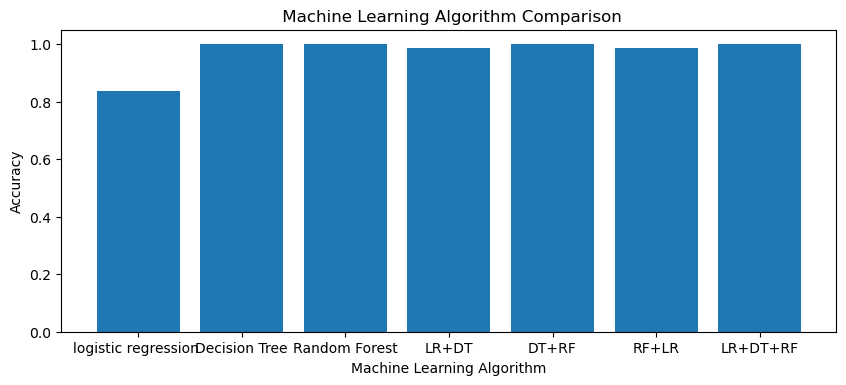

In [18]:
import matplotlib.pyplot as plt1

# Define the data
methods = ['logistic regression ', 'Decision Tree', 'Random Forest', 'LR+DT','DT+RF','RF+LR', 'LR+DT+RF']

accuracy = [dictFileInfo[0][1], dictFileInfo[1][1], dictFileInfo[2][1], dictFileInfo[3][1],dictFileInfo[4][1],dictFileInfo[5][1], dictFileInfo[6][1]]

# Create the plot
fig = plt1.figure(figsize=(10, 4), dpi=100)
plt1.bar(methods, accuracy)

# Set the plot title and labels
plt1.title(' Machine Learning Algorithm Comparison')
plt1.xlabel('Machine Learning Algorithm')
plt1.ylabel('Accuracy')

# Show the plot
plt1.show()

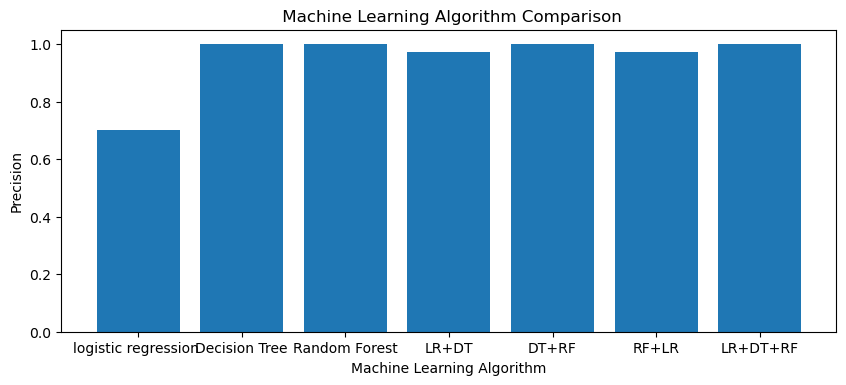

In [19]:
import matplotlib.pyplot as plt

# Define the data
methods = ['logistic regression ', 'Decision Tree', 'Random Forest', 'LR+DT','DT+RF','RF+LR','LR+DT+RF']

precision = [dictFileInfo[0][2], dictFileInfo[1][2], dictFileInfo[2][2], dictFileInfo[3][2],dictFileInfo[4][2],dictFileInfo[5][2],dictFileInfo[6][2]]

# Create the plot
fig = plt.figure(figsize=(10, 4), dpi=100)
plt.bar(methods, precision)

# Set the plot title and labels
plt.title(' Machine Learning Algorithm Comparison')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Precision')

# Show the plot
plt.show()

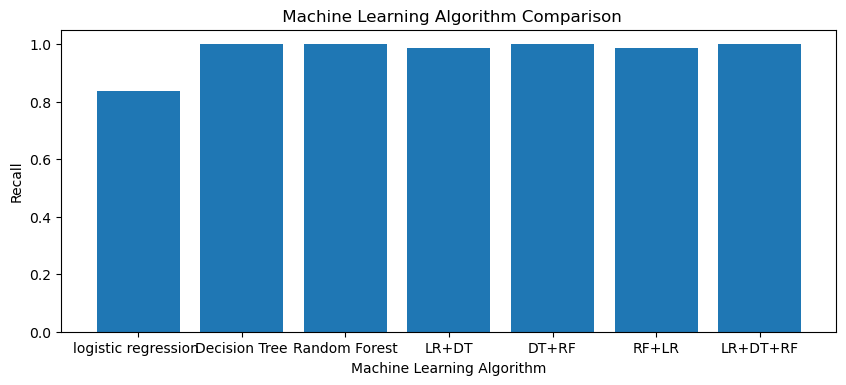

In [20]:
import matplotlib.pyplot as plt

# Define the data
methods = ['logistic regression ', 'Decision Tree', 'Random Forest', 'LR+DT','DT+RF','RF+LR' ,'LR+DT+RF']

recall = [dictFileInfo[0][3], dictFileInfo[1][3], dictFileInfo[2][3], dictFileInfo[3][3],dictFileInfo[4][3],dictFileInfo[5][3],dictFileInfo[6][3]]

# Create the plot
fig = plt.figure(figsize=(10, 4), dpi=100)
plt.bar(methods, recall)

# Set the plot title and labels
plt.title(' Machine Learning Algorithm Comparison')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Recall')

# Show the plot
plt.show()

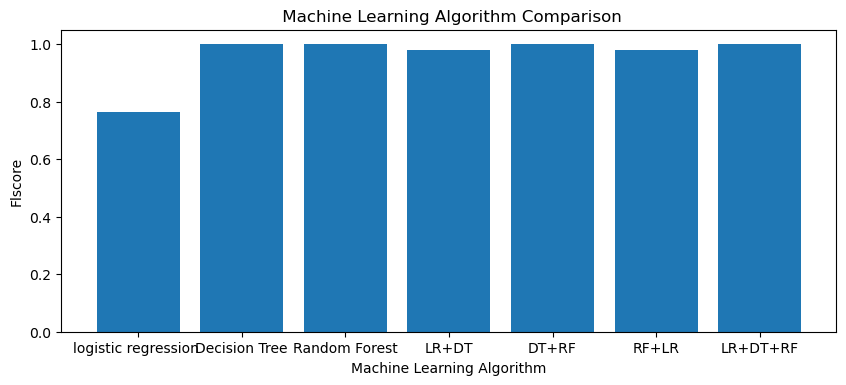

In [21]:
import matplotlib.pyplot as plt

# Define the data
methods = ['logistic regression ', 'Decision Tree', 'Random Forest', 'LR+DT','DT+RF','RF+LR','LR+DT+RF']

Flscore = [dictFileInfo[0][4], dictFileInfo[1][4], dictFileInfo[2][4], dictFileInfo[3][4],dictFileInfo[4][4],dictFileInfo[5][4],dictFileInfo[6][4]]

# Create the plot
fig = plt.figure(figsize=(10, 4), dpi=100)
plt.bar(methods, Flscore)

# Set the plot title and labels
plt.title(' Machine Learning Algorithm Comparison')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Flscore')

# Show the plot
plt.show()